# Chicago Crime Data Analysis

## Quick lookup

In [25]:
#Import Statements 
#Pandas to read csv create new rrd
import pandas as pd
from pandas import read_csv
crimes = read_csv('/home/bigdata/dataset/CrimeDataset.csv', index_col='Date')

In [26]:
print(type(crimes))

<class 'pandas.core.frame.DataFrame'>


In [27]:
#By Ommiting First three columns Viewing Other three columns by using iloc function
crimes = crimes.iloc[:, 3: ]
crimes.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Events,TemperatureF
Date,,,,,,,,,,,,,,,,,,,,,
05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24,...,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)",Rain-Thunderstorm,59.0
05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20,...,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)",Rain-Thunderstorm,60.0
05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37,...,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)",Rain-Thunderstorm,60.0
05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28,...,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)",Rain-Thunderstorm,57.0
05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28,...,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)",Rain-Thunderstorm,51.0


In [28]:
symbol = (())

In [29]:
crimes.index = pd.to_datetime(crimes.index)

In [30]:
#Creating Shape function for uploaded dataset which is columns and row
print crimes.shape
#printing Every columns with date as head
print crimes.head()

(6997, 21)
                                   Block IUCR            Primary Type  \
Date                                                                    
2016-05-03 23:40:00   013XX S SAWYER AVE  486                 BATTERY   
2016-05-03 21:40:00   061XX S DREXEL AVE  486                 BATTERY   
2016-05-03 23:31:00  053XX W CHICAGO AVE  470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00    049XX W FULTON ST  460                 BATTERY   
2016-05-03 22:00:00    003XX N LOTUS AVE  820                   THEFT   

                                 Description Location Description Arrest  \
Date                                                                       
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT   True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE  False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET  False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK  False   
2016-05-03 22:00:00  

In [31]:
#Getting these column from dataset 
s = crimes[['Primary Type','Events','TemperatureF']]

In [9]:
#Head Selected values from dataset
s.head()

,Primary Type,Events,TemperatureF
Date,,,
2016-05-03 23:40:00,BATTERY,Rain-Thunderstorm,59.0
2016-05-03 21:40:00,BATTERY,Rain-Thunderstorm,60.0
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,Rain-Thunderstorm,60.0
2016-05-03 22:10:00,BATTERY,Rain-Thunderstorm,57.0
2016-05-03 22:00:00,THEFT,Rain-Thunderstorm,51.0


In [32]:
#Usig GroupBy Function to remove duplicate values from column and count function to count the occurance
cri_count = pd.DataFrame(s.groupby(['Primary Type','Events','TemperatureF']).size().sort_values(ascending=False).rename('CRIME_COUNTS').reset_index())

In [33]:
cri_count.head(15)

,Primary Type,Events,TemperatureF,CRIME_COUNTS
0,THEFT,Rain,62.0,22
1,THEFT,Rain,60.0,18
2,THEFT,Rain-Thunderstorm,60.0,18
3,THEFT,Rain,66.0,17
4,THEFT,Rain,68.0,16
5,THEFT,Rain,64.0,16
6,BATTERY,Rain,62.0,15
7,BATTERY,Rain,68.0,15
8,CRIMINAL DAMAGE,Rain,60.0,14
9,BATTERY,Rain,66.0,13


In [35]:
#Shaping Crime Count Which is rows and columns
cri_count.shape

(930, 4)

In [36]:
#Getting Events from Dataset
events = crimes[['Events']]

In [37]:
#Heading Data's selected from events
events.head()

,Events
Date,
2016-05-03 23:40:00,Rain-Thunderstorm
2016-05-03 21:40:00,Rain-Thunderstorm
2016-05-03 23:31:00,Rain-Thunderstorm
2016-05-03 22:10:00,Rain-Thunderstorm
2016-05-03 22:00:00,Rain-Thunderstorm


In [39]:
#Event groupby command with crime counts
event_count = pd.DataFrame(events.groupby('Events').size().sort_values(ascending=False).rename('count').reset_index())

In [40]:
#Event_Count Heading Function
event_count.head()

,Events,count
0,Rain,918
1,Rain-Thunderstorm,484
2,Fog,245
3,Snow,153
4,Fog-Rain,97


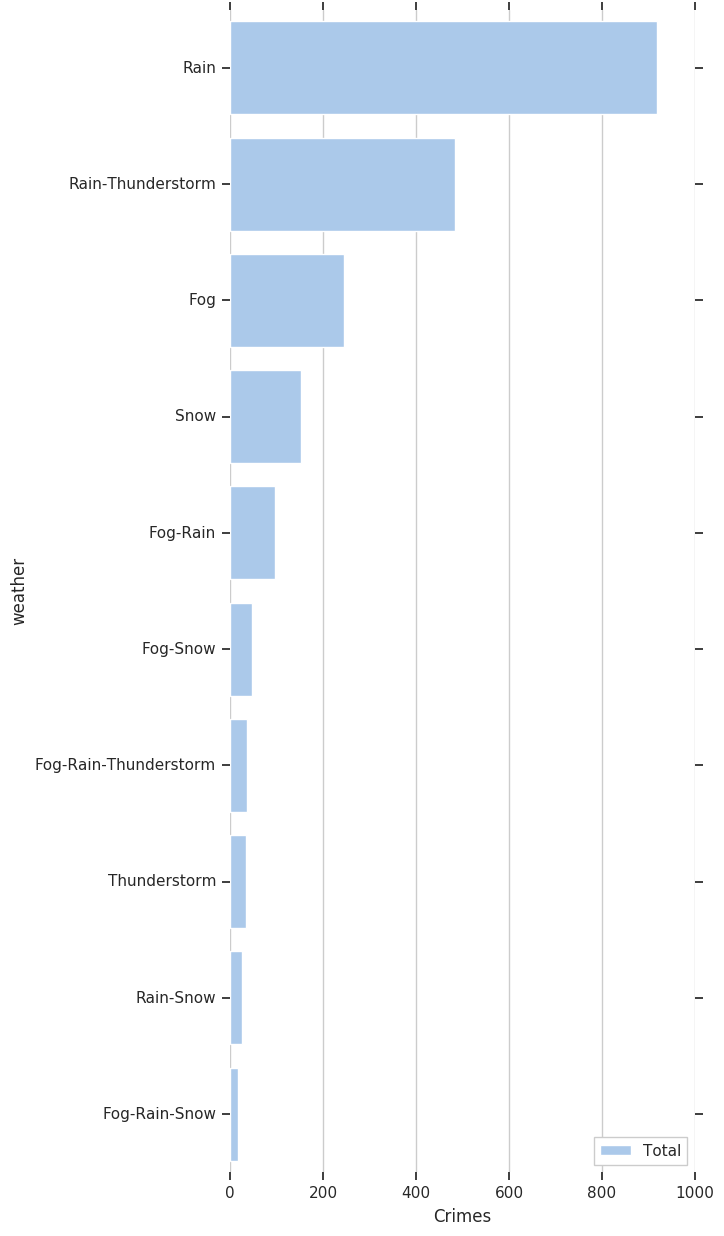

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="count", y="Events", data=event_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="weather",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [43]:
#Getting Crime Types with their count
crime_count = pd.DataFrame(s.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

## Arrests

In [44]:
#Heading Crime
crime_count.head()

,Primary Type,counts
0,THEFT,1463
1,BATTERY,1245
2,CRIMINAL DAMAGE,767
3,NARCOTICS,702
4,DECEPTIVE PRACTICE,544


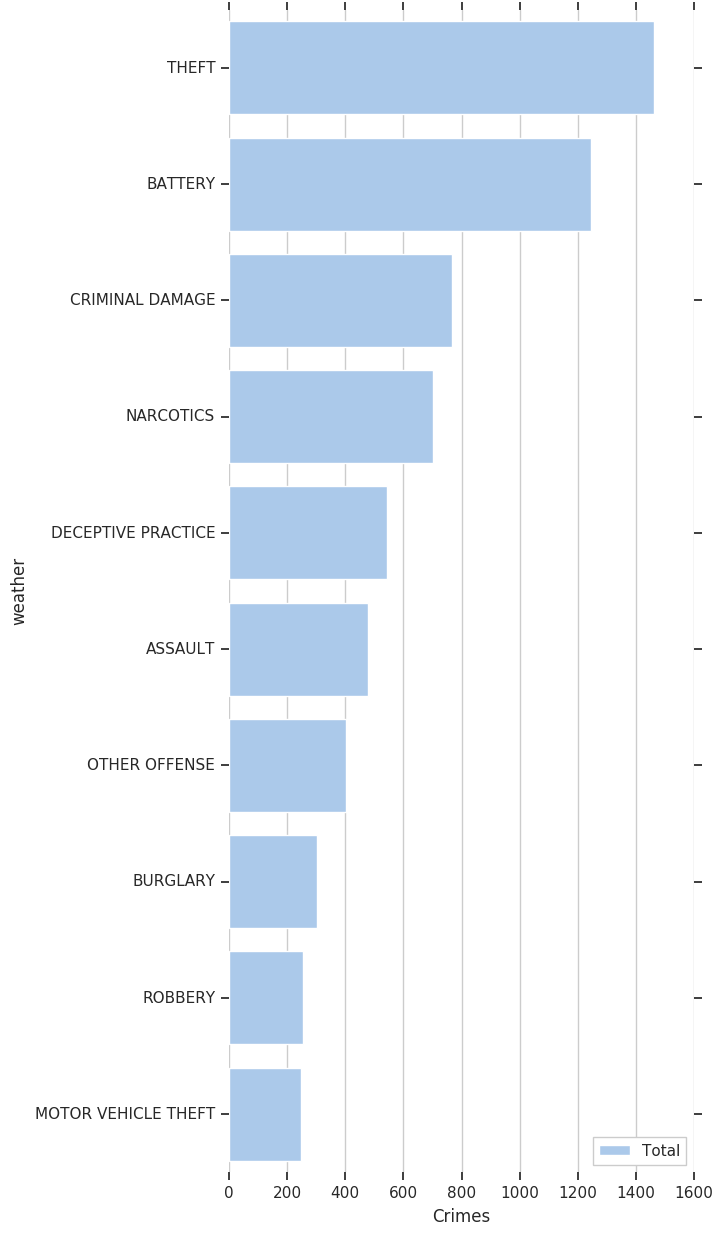

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="weather",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [48]:
#ALGORITHM: LOGESTIC REGRESSTION
#Getting Arrest By Years 

crimes_2012 = crimes.loc['2012']
crimes_2013 = crimes.loc['2013']
crimes_2014 = crimes.loc['2014']
crimes_2015 = crimes.loc['2015']
crimes_2016 = crimes.loc['2016']


## Yearly crimes
arrest_yearly = crimes[crimes['Arrest'] == True]['Arrest']

In [49]:
#Printing the column
print arrest_yearly.head()

Date
2016-05-03 23:40:00    True
2016-05-03 21:44:00    True
2016-05-03 23:11:00    True
2016-05-04 11:15:00    True
2016-05-04 11:30:00    True
Name: Arrest, dtype: bool


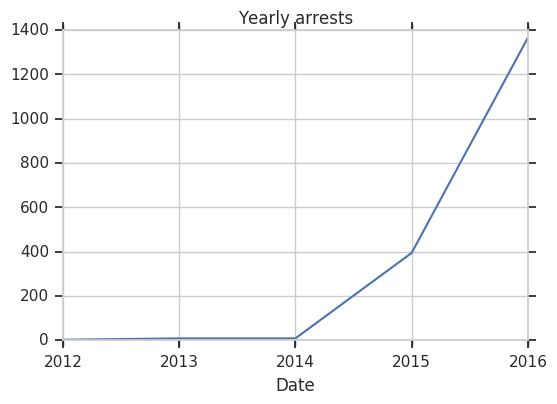

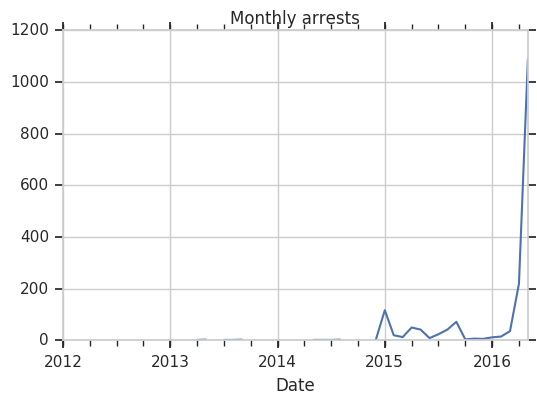

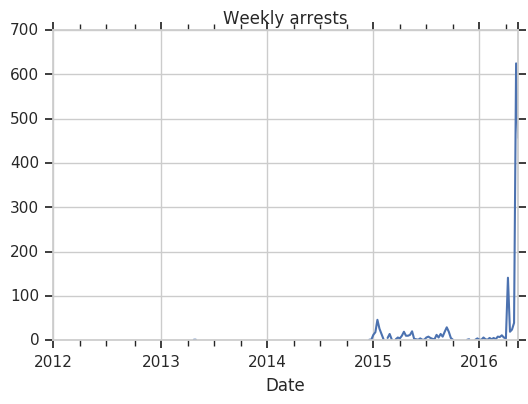

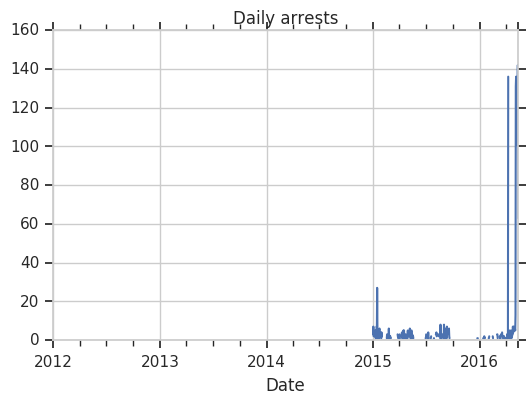

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.subplot()
# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()
# Monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

In [53]:
#CLASSIFICATION OF DOMESTIC VIOLENCE WITH YEAR , MONTH , WEEK , DAY

In [54]:
#Getting Domestic violence column and heading it
domestic_yearly = crimes[crimes['Domestic'] == True]['Domestic']
print domestic_yearly.head()

Date
2016-05-03 23:40:00    True
2016-05-03 21:40:00    True
2016-05-03 22:00:00    True
2016-05-03 22:30:00    True
2016-05-03 23:11:00    True
Name: Domestic, dtype: bool


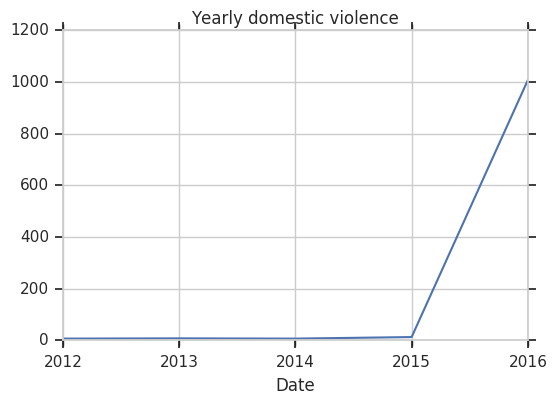

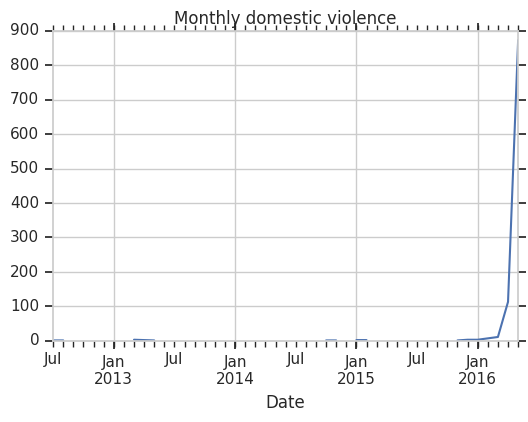

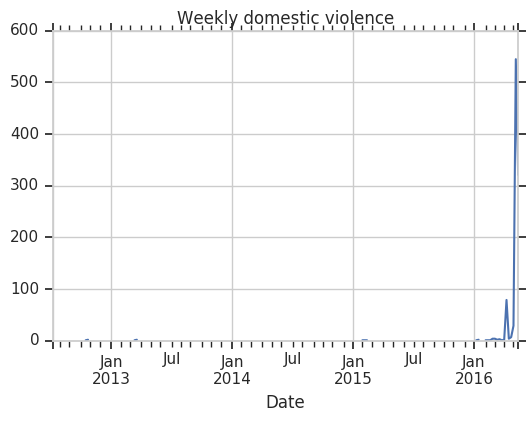

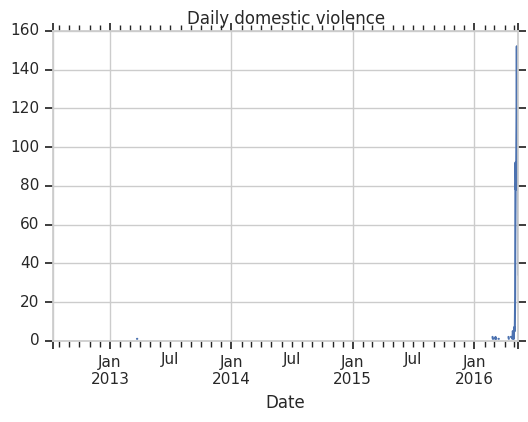

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.subplot()
# yearly domestic violence
domestic_yearly.resample('A').sum().plot()
plt.title('Yearly domestic violence')
plt.show()
# Monthly domestic violence
domestic_yearly.resample('M').sum().plot()
plt.title('Monthly domestic violence')
plt.show()
# Weekly domestic violence
domestic_yearly.resample('W').sum().plot()
plt.title('Weekly domestic violence')
plt.show()
# daily domestic violence
domestic_yearly.resample('D').sum().plot()
plt.title('Daily domestic violence')
plt.show()
plt.show()

## Top 5 crimes trend over the years

### Monthly

In [2]:
#getting Primary type column from dataset with year and rows as isin functions
theft_2012 = pd.DataFrame(crimes_2012[crimes_2012['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2013 = pd.DataFrame(crimes_2013[crimes_2013['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2014 = pd.DataFrame(crimes_2014[crimes_2014['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2015 = pd.DataFrame(crimes_2015[crimes_2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2016 = pd.DataFrame(crimes_2016[crimes_2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

NameError: name 'crimes_2012' is not defined

In [59]:
# M here refers to Month Of crimes i.e Primary Type
grouper = theft_2012.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2013 = theft_2013.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2014 = theft_2014.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2015 = theft_2015.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2016 = theft_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])

In [60]:
#Now we Count the Datas stored
data_2012 = grouper['Primary Type'].count().unstack()
data_2013 = grouper_2013['Primary Type'].count().unstack()
data_2014 = grouper_2014['Primary Type'].count().unstack()
data_2015 = grouper_2015['Primary Type'].count().unstack()
data_2016 = grouper_2016['Primary Type'].count().unstack()

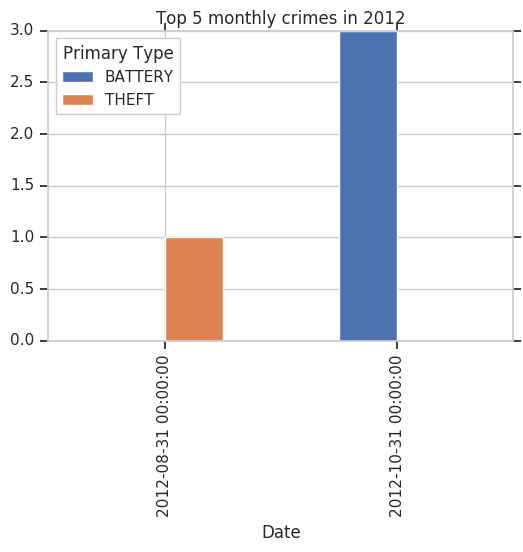

In [61]:
data_2012.plot.bar()
plt.title("Top 5 monthly crimes in 2012")
plt.show()

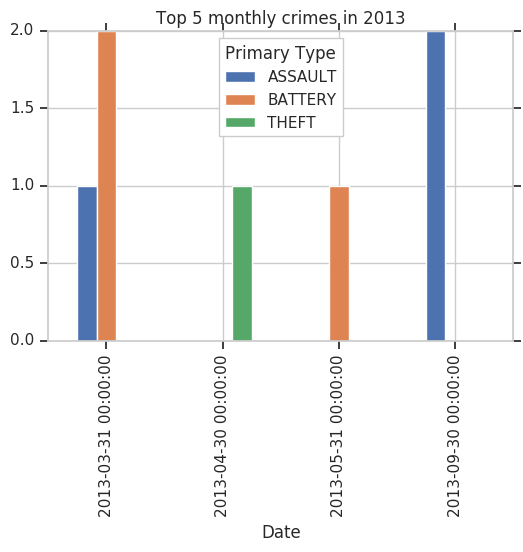

In [62]:
data_2013.plot.bar()
plt.title("Top 5 monthly crimes in 2013")
plt.show()

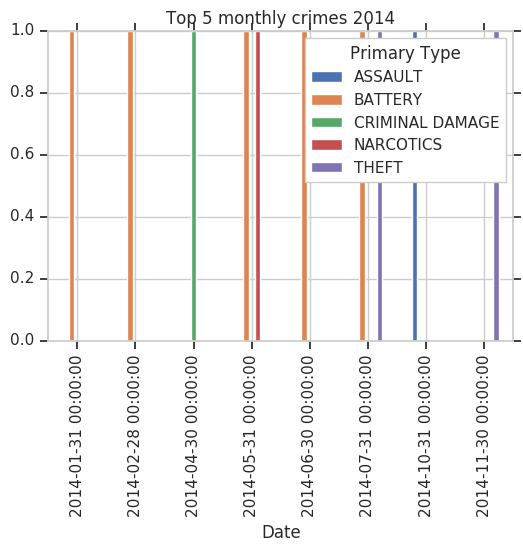

In [39]:
import seaborn as sns
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
data_2014.plot.bar()
plt.title("Top 5 monthly crimes 2014")
plt.show()

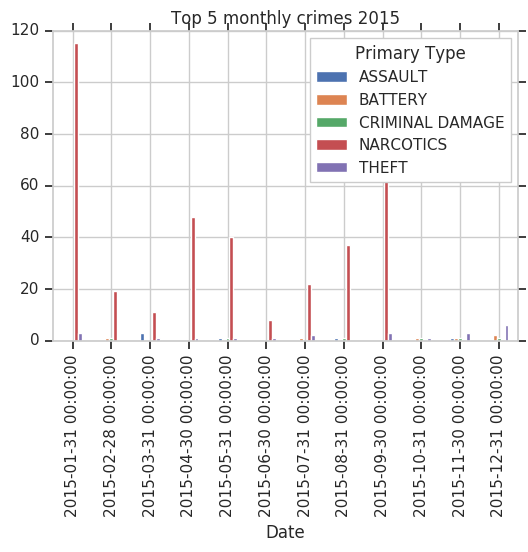

In [40]:
data_2015.plot.bar()
plt.title("Top 5 monthly crimes 2015")
plt.show()

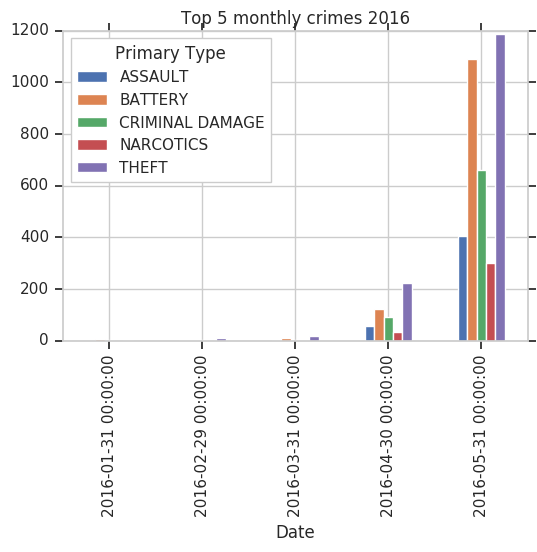

In [41]:
data_2016.plot.bar()
plt.title("Top 5 monthly crimes 2016")
plt.show()

###  Weekly

In [42]:
# W here refers to week as primary type
grouper = theft_2012.groupby([pd.TimeGrouper('W'), 'Primary Type'])
grouper_2013 = theft_2013.groupby([pd.TimeGrouper('W'), 'Primary Type'])
grouper_2014 = theft_2014.groupby([pd.TimeGrouper('W'), 'Primary Type'])
grouper_2015 = theft_2015.groupby([pd.TimeGrouper('W'), 'Primary Type'])
grouper_2016 = theft_2016.groupby([pd.TimeGrouper('W'), 'Primary Type'])

data_2012 = grouper['Primary Type'].count().unstack()
data_2013 = grouper_2013['Primary Type'].count().unstack()
data_2014 = grouper_2014['Primary Type'].count().unstack()
data_2015 = grouper_2015['Primary Type'].count().unstack()
data_2016 = grouper_2016['Primary Type'].count().unstack()

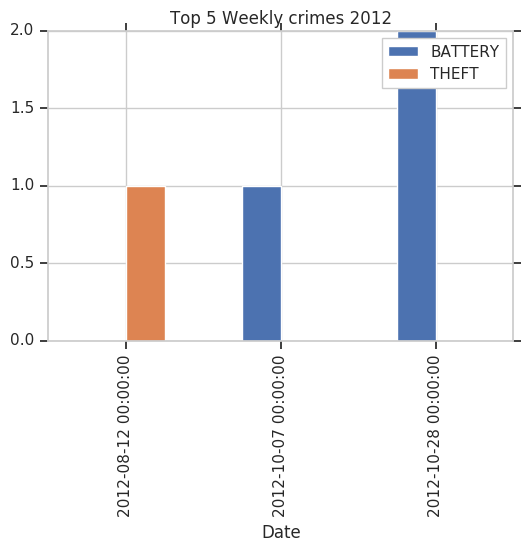

In [43]:
data_2012.plot.bar()
plt.title("Top 5 Weekly crimes 2012")
plt.legend()
plt.show()

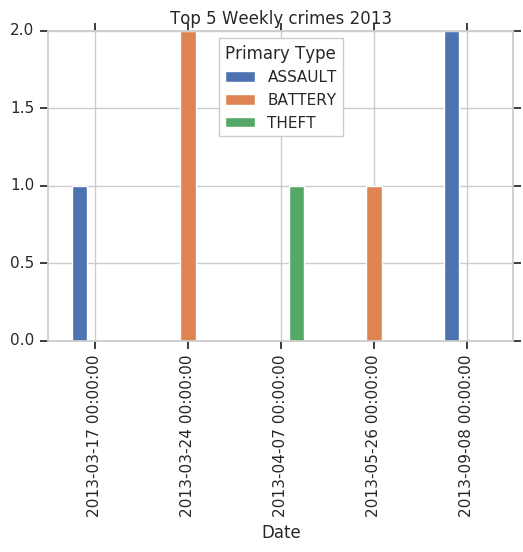

In [44]:
data_2013.plot.bar()
plt.title("Top 5 Weekly crimes 2013")
plt.show()

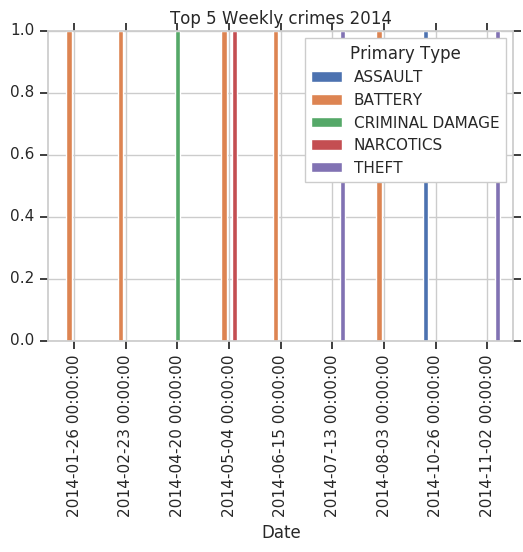

In [45]:
data_2014.plot.bar()
plt.title("Top 5 Weekly crimes 2014")
plt.show()

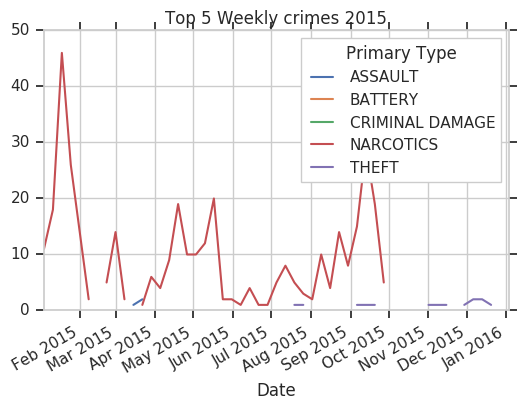

In [47]:
data_2015.plot()
plt.title("Top 5 Weekly crimes 2015")
plt.show()

In [ ]:
data_2016.plot()
plt.title("Top 5 Weekly crimes 2016")
plt.show()

### Daily

In [33]:
grouper = theft_2012.groupby([pd.TimeGrouper('D'), 'Primary Type'])
grouper_2013 = theft_2013.groupby([pd.TimeGrouper('D'), 'Primary Type'])
grouper_2014 = theft_2014.groupby([pd.TimeGrouper('D'), 'Primary Type'])
grouper_2015 = theft_2015.groupby([pd.TimeGrouper('D'), 'Primary Type'])
grouper_2016 = theft_2016.groupby([pd.TimeGrouper('D'), 'Primary Type'])

data_2012 = grouper['Primary Type'].count().unstack()
data_2013 = grouper_2013['Primary Type'].count().unstack()
data_2014 = grouper_2014['Primary Type'].count().unstack()
data_2015 = grouper_2015['Primary Type'].count().unstack()
data_2016 = grouper_2016['Primary Type'].count().unstack()

NameError: name 'theft_2012' is not defined

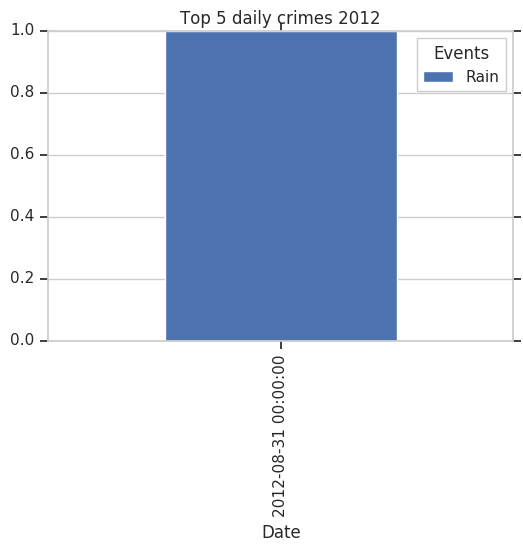

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")

sns.set(style="whitegrid")
data_2012.plot.bar()
plt.title("Top 5 daily crimes 2012")
plt.show()

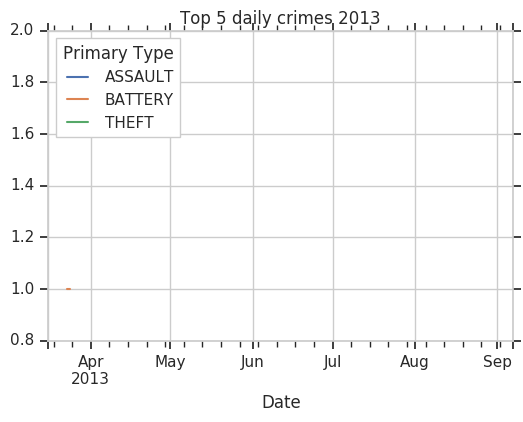

In [61]:
data_2013.plot()
plt.title("Top 5 daily crimes 2013")
plt.show()

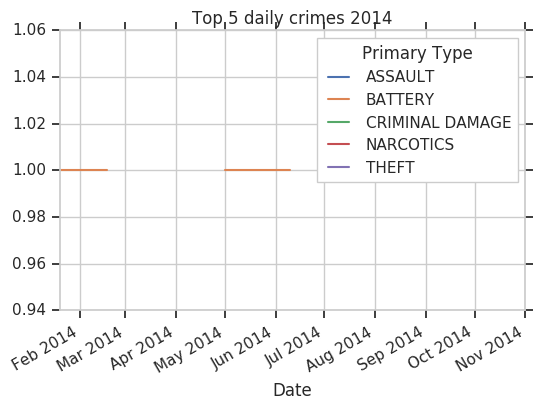

In [62]:
data_2014.plot()
plt.title("Top 5 daily crimes 2014")
plt.show()

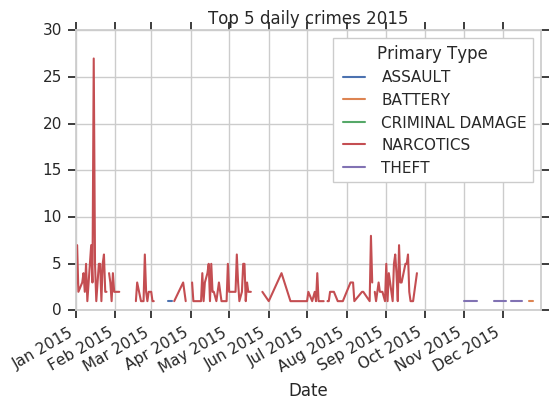

In [63]:
data_2015.plot()
plt.title("Top 5 daily crimes 2015")
plt.show()

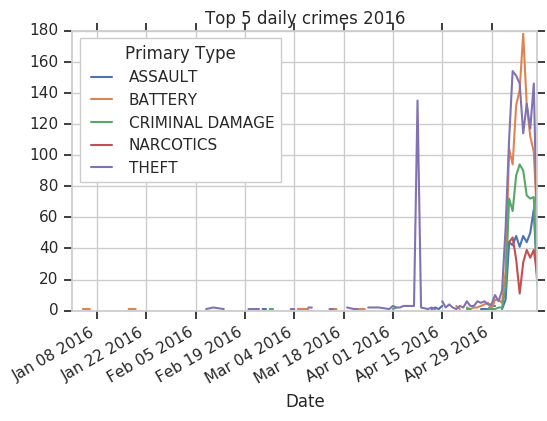

In [64]:
data_2016.plot()
plt.title("Top 5 daily crimes 2016")
plt.show()